In [95]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import math
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from mpctools.extensions import skext, npext
from mpctools.extensions.mplext import plot_matrix
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.stats import pearsonr
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.decomposition as dec

In [2]:
data_path = os.path.join(os.getcwd(), '20ng_train.csv')
ng_train = pd.read_csv(data_path, delimiter = ',', compression='bz2')

data_path = os.path.join(os.getcwd(), '20ng_test.csv')
ng_test = pd.read_csv(data_path, delimiter = ',', compression='bz2')


In [4]:
ng_train.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705,3.345255
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841,2.208888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056,7.000000


In [5]:
ng_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 14.4 MB


In [12]:
ng_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5648 entries, 0 to 5647
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 43.1 MB


In [3]:
X = ng_train.drop(columns="class")
y= ng_train['class']

In [4]:
A = ng_test.drop(columns="class")
b = ng_test['class']

In [12]:
X.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.006102,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.034573,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.487020,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056


In [15]:
ng_test.describe()

,__,ability,able,ac,accept,access,according,account,act,action,...,worth,wouldn,write,written,wrong,wrote,year,years,yes,class
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449,3.345194
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570,2.208286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114,7.000000


In [12]:
y.describe()

count    5648.000000
mean        3.345255
std         2.208888
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: class, dtype: float64

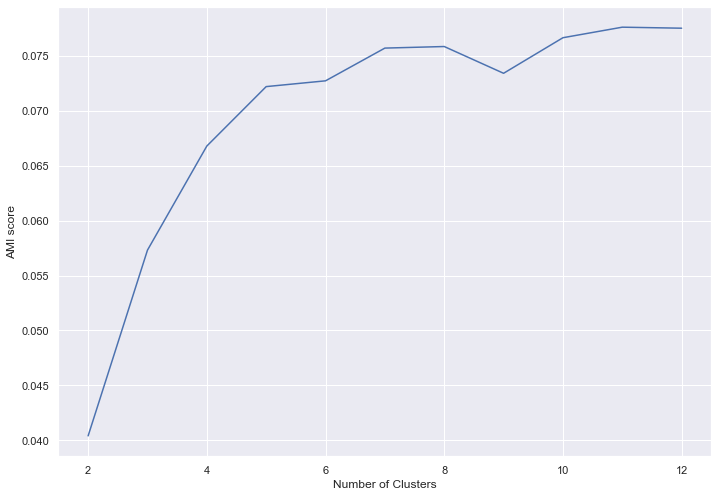

In [110]:
values= [2,3,4,5,6,7,8,9,10,11,12]
array = []
for i in range(2,13):
    kmeans=KMeans(n_clusters=i, random_state=1000, n_init=50).fit(X)
    ami=adjusted_mutual_info_score(y, kmeans.predict(X), average_method='max')
    array.append(ami)
plt.plot(values,array)
plt.xlabel('Number of Clusters')
plt.ylabel('AMI score')
plt.show()

In [20]:
ng_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Columns: 1001 entries, __ to class
dtypes: float64(1000), int64(1)
memory usage: 14.4 MB


In [113]:
kmeans=KMeans(n_clusters=4, random_state=1000, n_init=50).fit(X)
predictions = kmeans.predict(X)

Text(0.5, 0, 'Clusters')

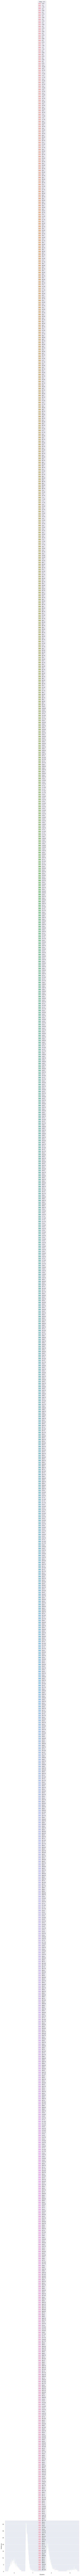

In [114]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=predictions, hue=y)
plt.ylabel('Instances') 
plt.xlabel('Clusters')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

NameError: name 'train_test_split' is not defined

In [ ]:
#3.
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
f1_score(y_test, gnb_predictions, average='macro')

In [13]:
# 3.4.
sum = 0
res = []
for train_index_array, test_index_array in skf.split(X, y):
    train_instances = [X.iloc[i] for i in train_index_array]
    train_output = [y.iloc[i] for i in train_index_array]
    test_instances = [X.iloc[i] for i in test_index_array]
    test_output = [y.iloc[i] for i in test_index_array]
    
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X=train_instances, y=train_output)
    predictions = lr.predict(test_instances)
    #print(f1_score(predictions, test_output, average='macro'))
    f1 = f1_score(predictions, test_output, average='macro')
    res.append(f1)
arr = np.asarray(res)
print(np.mean(arr))
print(np.std(arr))

0.6689909262264606
0.016922045421971926


In [17]:
#3.2
baseline = DummyClassifier(strategy="uniform", random_state=None, constant=None)
baseline.fit(X,y)
prediction = baseline.predict(ng_test)
print(f1_score(prediction, ng_test['class'], average="macro"))
#print(f1)


0.13442728183382371


In [38]:
#3.5
trs=[]
tes=[]
C_range = np.logspace(-4,5, num  = 19)
#valC = [10**(-4),10**(-3.5),10**(-3),10**(-2.5),10**(-2),10**(-1.5),10**(-1.0),10**(-0.5),10**(-0),10**(0.5),10**(1.0),10**(1.5),
 #        10**(2.0),10**(2.5),10**(3.0),10**(3.5),10**(4.0),10**(4.5),10**(5.0)]
solT=[]
solV=[]

for C in C_range:
    solT=[]
    solV=[]
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        lf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=C).fit(X_train, y_train)
        
        y_pred=lf.predict(X=X_test)                                      
        solV.append(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))   
        y_pred=lf.predict(X=X_train)
        solT.append(f1_score(y_true=y_train, y_pred=y_pred, average='macro'))
    
    solT=pd.Series(solT)
    trs.append(solT.mean())
    solV=pd.Series(solV)
    tes.append(solV.mean())

/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: 

/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: 

/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: 

/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: 

/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", 

/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", 

/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", 

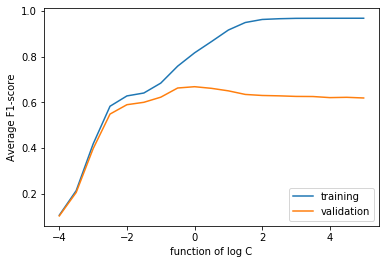

In [24]:
aux=pd.Series([i for i in range(-8,11)])
aux=aux/2
plt.plot(aux,trs, label = 'training')
plt.plot(aux,tes, label = 'validation')
plt.legend(loc = 'lower right')
#plt.xticks(np.arange(19),valC)

plt.xlabel('function of log C')
plt.ylabel('Average F1-score')
plt.show()

In [27]:
#3.7.
lf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',C=1, max_iter=200).fit(X, y)
y_pred = lf.predict(A)
print(f1_score(y_true=b, y_pred=y_pred, average='macro'))

0.6747698176259582


In [5]:
#4.
data_path_bristol = os.path.join(os.getcwd(), 'BristolAir_Exploratory.csv')
bristol = pd.read_csv(data_path_bristol, delimiter = ',', compression ='bz2')
bristol.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [30]:
bristol.info()
bristol.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306758 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1306758 non-null object
NOx          1191220 non-null float64
NO2          1188426 non-null float64
NO           1197536 non-null float64
SiteID       1306758 non-null int64
Loc.Lat      1306758 non-null float64
Loc.Long     1306758 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.8+ MB


,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.00,28.00,28.75,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.50,32.00,32.50,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.00,97.75,68.00,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.80,39.52,44.52,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.78,31.94,54.67,8,51.489993,-2.688779


In [32]:
bristol.tail()

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
1306753,2019-08-11 19:00:00+00:00,36.720001,13.770000,14.932825,6,51.427864,-2.563742
1306754,2019-08-11 20:00:00+00:00,23.524000,15.683000,5.114000,11,51.457950,-2.583989
1306755,2019-08-12 03:00:00+00:00,62.839438,23.158247,25.883561,13,51.455269,-2.596649
1306756,2019-08-12 09:00:00+00:00,422.792179,103.165562,208.406935,13,51.455269,-2.596649
1306757,2019-08-07 08:00:00+00:00,99.641000,36.529000,41.161000,7,51.462829,-2.584541


In [6]:
#4.2.
d={}
for j in range(0, 18):
    curent = bristol.loc[bristol['SiteID'] == j]
    missing = curent.shape[0] - curent.dropna().shape[0]
    negative = curent.shape[0] - ((curent['NOx']>=0) & (curent['NO2']>=0) & (curent['NO']>=0)).sum()
    d[j] = (curent.shape[0], missing / curent.shape[0] * 100.0, negative / curent.shape[0] * 100.0)
d

{0: (6446, 1.6134036611852314, 1.6134036611852314),
 1: (163111, 6.290195020568815, 6.290195020568815),
 2: (62990, 4.34830925543737, 4.353071916177171),
 3: (25464, 77.33270499528746, 78.11027332704995),
 4: (74787, 2.068541324026903, 2.072552716381189),
 5: (113952, 8.828278573434428, 8.828278573434428),
 6: (142141, 7.4440168565016425, 7.446830963620631),
 7: (115162, 4.19496014310276, 4.4728295792014725),
 8: (43824, 21.05695509309967, 21.05695509309967),
 9: (22071, 5.301073807258393, 5.301073807258393),
 10: (96407, 3.589988278859419, 3.5941373551713047),
 11: (20693, 1.9040255158749335, 1.9813463490069108),
 12: (45240, 17.48452696728559, 17.48452696728559),
 13: (12423, 51.460999758512436, 51.47709892940514),
 14: (113951, 10.531719774288948, 10.531719774288948),
 15: (2712, 100.0, 100.0),
 16: (154331, 6.53076828375375, 6.544375400923988),
 17: (91053, 6.271072891612578, 6.27326941451682)}

In [35]:
sites = range(0,18)
auxTotal=[]
auxMissingProb=[]
auxNegativeProb=[]
for site in sites:
    auxMis=bristol.loc[bristol.SiteID==site].isnull().any(axis=1).sum()
    auxNeg=(bristol.loc[bristol.SiteID==site].drop(['Date Time','Loc.Long','Loc.Lat'], axis=1)<0).any(axis=1).sum()
    auxTot=bristol.loc[bristol.SiteID==site].shape[0]
    
    auxTotal.append(auxTot)
    auxMissingProb.append((auxMis*100)/auxTot)
    auxNegativeProb.append((auxNeg*100)/auxTot)
    
sol=[]
for i in range(0,18):
    sol.append([auxTotal[i], auxMissingProb[i], auxNegativeProb[i]])
sol=np.array(sol)

res=pd.DataFrame(sol,columns=['Total samples','Percentage of missing samples', 'Percentage of negative samples'])
res

,Total samples,Percentage of missing samples,Percentage of negative samples
0,6446.0,1.613404,0.000000
1,163111.0,6.290195,0.000000
2,62990.0,4.348309,0.004763
3,25464.0,77.332705,0.777568
4,74787.0,2.068541,0.005349
5,113952.0,8.828279,0.000000
6,142141.0,7.444017,0.002814
7,115162.0,4.194960,0.277869
8,43824.0,21.056955,0.000000
9,22071.0,5.301074,0.000000


In [37]:
res.to_latex(index = True)

'\\begin{tabular}{lrrr}\n\\toprule\n{} &  Total samples &  Percentage of missing samples &  Percentage of negative samples \\\\\n\\midrule\n0  &         6446.0 &                       1.613404 &                        0.000000 \\\\\n1  &       163111.0 &                       6.290195 &                        0.000000 \\\\\n2  &        62990.0 &                       4.348309 &                        0.004763 \\\\\n3  &        25464.0 &                      77.332705 &                        0.777568 \\\\\n4  &        74787.0 &                       2.068541 &                        0.005349 \\\\\n5  &       113952.0 &                       8.828279 &                        0.000000 \\\\\n6  &       142141.0 &                       7.444017 &                        0.002814 \\\\\n7  &       115162.0 &                       4.194960 &                        0.277869 \\\\\n8  &        43824.0 &                      21.056955 &                        0.000000 \\\\\n9  &        22071.0 &  

In [39]:
#4.4.
bristol = bristol.query('SiteID != 3 & SiteID != 15')
bristol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278582 entries, 0 to 1306757
Data columns (total 7 columns):
Date Time    1278582 non-null object
NOx          1185448 non-null float64
NO2          1182654 non-null float64
NO           1191764 non-null float64
SiteID       1278582 non-null int64
Loc.Lat      1278582 non-null float64
Loc.Long     1278582 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 78.0+ MB


In [41]:
#4.5 
brcor = bristol.corr()
brcor

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
NOx,1.000000,0.878016,0.988019,0.226668,-0.020511,-0.075187
NO2,0.878016,1.000000,0.807853,0.297316,-0.013581,-0.086150
NO,0.988019,0.807853,1.000000,0.193246,-0.019080,-0.078435
SiteID,0.226668,0.297316,0.193246,1.000000,0.193402,-0.216233
Loc.Lat,-0.020511,-0.013581,-0.019080,0.193402,1.000000,-0.199014
Loc.Long,-0.075187,-0.086150,-0.078435,-0.216233,-0.199014,1.000000


In [49]:
#4.6
data_path = os.path.join(os.getcwd(), 'BristolAir_SiteAligned.csv')
ba_sa = pd.read_csv(data_path, delimiter = ',', compression='bz2' ,header=[0,1], parse_dates=[0])
ba_sa.drop(columns=['Date Time'], inplace=True)


/afs/inf.ed.ac.uk/user/s17/s1729140/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/pandas/core/generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [50]:
#4.6
ba_sa[('NOx', '1')]
df_NOx=pd.DataFrame(np.zeros((10,10)), columns=[i for i in ba_sa['NOx']], index=[i for i in ba_sa['NOx']])
df_NO=pd.DataFrame(np.zeros((10,10)), columns=[i for i in ba_sa['NOx']], index=[i for i in ba_sa['NOx']])
df_NO2=pd.DataFrame(np.zeros((10,10)), columns=[i for i in ba_sa['NOx']], index=[i for i in ba_sa['NOx']])
for i in ba_sa['NOx']:
    for j in ba_sa['NOx']:
        df_NOx[i][j]=pearsonr(ba_sa[('NOx', str(i))], ba_sa['NOx', str(j)])[0]
        df_NO[i][j]=pearsonr(ba_sa[('NO', str(i))], ba_sa['NO', str(j)])[0]
        df_NO2[i][j]=pearsonr(ba_sa[('NO2', str(i))], ba_sa['NO2', str(j)])[0]
matrix_NOx = np.matrix(df_NOx)
matrix_NO = np.matrix(df_NO)        
matrix_NO2 = np.matrix(df_NO2)

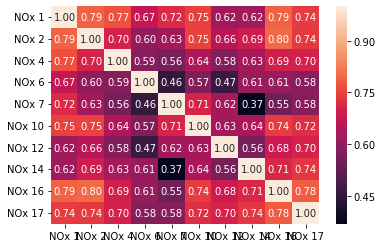

In [51]:
plot_matrix(matrix_NOx, labels=['NOx '+str(i) for i in ba_sa['NOx']], mode='heatmap', show_val=True)
#sns.heatmap(matrix_NO, annot=True)

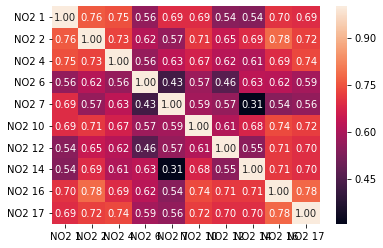

In [53]:
plot_matrix(matrix_NO2, labels=['NO2 '+str(i) for i in ba_sa['NO2']], mode='heatmap', show_val=True)

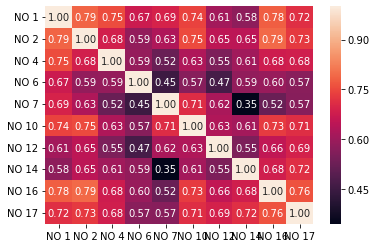

In [54]:
plot_matrix(matrix_NO, labels=['NO '+str(i) for i in ba_sa['NO']], mode='heatmap', show_val=True)

In [7]:
print(matrix_NO.corr().mean().mean())
#print(pd2.corr().mean().mean())
#print(pd3.corr().mean().mean())

NameError: name 'matrix_NO' is not defined

In [8]:
#5.
data_path_bristoldayaligned = os.path.join(os.getcwd(), 'BristolAir_DayAligned.csv')
bristol_dayaligned = pd.read_csv(data_path_bristoldayaligned, delimiter = ',', header=[0], parse_dates=[1], index_col=[0, 1], compression ='bz2')
bristol_dayaligned

0          1          2          3           4  \
SiteID Date                                                                 
1      2004-07-02  25.250000  18.000000  12.500000   9.250000    8.750000   
       2004-07-03  22.250000  21.000000  23.500000  33.750000   15.500000   
       2004-07-04  28.250000  22.250000  32.000000  34.500000   50.500000   
       2004-07-05  56.750000  62.500000  79.500000  78.500000  115.750000   
       2004-07-06  94.250000  68.250000  44.500000  47.670000   31.750000   
...                      ...        ...        ...        ...         ...   
16     2019-08-04  30.360938  20.272500  16.638750  18.981563   25.914375   
       2019-08-06  12.144375   4.494375   5.115938   4.350938    7.124063   
       2019-08-08  12.096563   6.932813   9.180000  17.069063   39.062813   
       2019-08-10   3.107813   4.590000   3.681563   3.585938    4.159688   
       2019-08-11   6.502500   4.685625   2.438438   5.068125    3.681563   

                            5           6           7          8          9  \
SiteID Date                                                                   
1      2004-07-02   14.500000   18.500000   30.750000  35.250000  39.000000   
       2004-07-03    9.000000   14.000000   57.750000  49.750000  49.750000   
       2004-07-04   76.500000  165.750000  170.000000  63.250000  57.750000   
       2004-07-05  149.000000  175.000000  119.000000  83.750000  94.750000   
       2004-07-06   28.250000   31.750000   55.750000  41.000000  37.750000   
...                       ...         ...         ...        ...        ...   
16     2019-08-04   25.531875   37.867500   41.357812  30.313126  43.844062   
       2019-08-06   12.670313   34.233750   57.614063  63.973125  66.698439   
       2019-08-08   60.482812  111.833438  116.805937  91.799998  73.870312   
       2019-08-10    5.163750    8.558438    9.945000  10.710000  16.877813   
       2019-08-11    5.594063    4.159688    6.837188   7.171875   9.610313   

                   ...         62         63         64         65         66  \
SiteID Date        ...                                                          
1      2004-07-02  ...  14.250000  13.750000  12.000000  12.500000  10.750000   
       2004-07-03  ...  12.000000  10.250000  11.000000  14.750000  12.500000   
       2004-07-04  ...  19.250000  29.750000  17.500000  26.500000  18.250000   
       2004-07-05  ...  19.250000  23.500000  12.000000  15.500000  12.500000   
       2004-07-06  ...   3.250000   2.250000   3.000000   2.000000   2.000000   
...                ...        ...        ...        ...        ...        ...   
16     2019-08-04  ...  13.280550  19.359675  12.999975   9.383675  16.055125   
       2019-08-06  ...  24.441199  20.887250  40.215750  34.386025  20.357275   
       2019-08-08  ...  19.110275  23.724175  36.692976  35.414799  52.529875   
       2019-08-10  ...  15.899250  12.844100  11.752975  10.786550   9.788950   
       2019-08-11  ...  19.546725  14.683425   9.695425  11.098300  13.311725   

                          67         68         69         70         71  
SiteID Date                                                               
1      2004-07-02  10.500000   9.250000   9.000000   7.750000  10.750000  
       2004-07-03  11.500000   5.750000   8.250000   6.250000   1.250000  
       2004-07-04  18.750000  12.500000  14.000000  20.750000  26.000000  
       2004-07-05  13.500000  17.750000  38.000000  39.250000  21.500000  
       2004-07-06   1.000000   0.750000   0.750000   1.000000   0.250000  
...                      ...        ...        ...        ...        ...  
16     2019-08-04  14.278150  10.786550  12.189425   7.139075   5.673850  
       2019-08-06  18.954400  16.148650   8.666650   9.196625   3.148675  
       2019-08-08  34.292500  15.649850  10.350100  12.095900   6.047950  
       2019-08-10   8.011975   6.889675   4.426850   4.270975   2.774575  
       2019-08-11   9.009575   8.541950  22

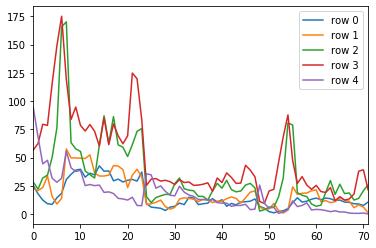

In [12]:
#5.1
colors= []
for i in range(0,5):
    row = bristol_dayaligned.iloc[i]
    row.plot(kind='line', label = 'row ' + str(i))
plt.legend(loc='upper right')


In [13]:
a = range(0,24)
b = range(24, 48)
c = range(48, 72)
nox = bristol_dayaligned.iloc[: , a].copy()
no2 = bristol_dayaligned.iloc[: , b].copy()
no = bristol_dayaligned.iloc[: , c].copy()

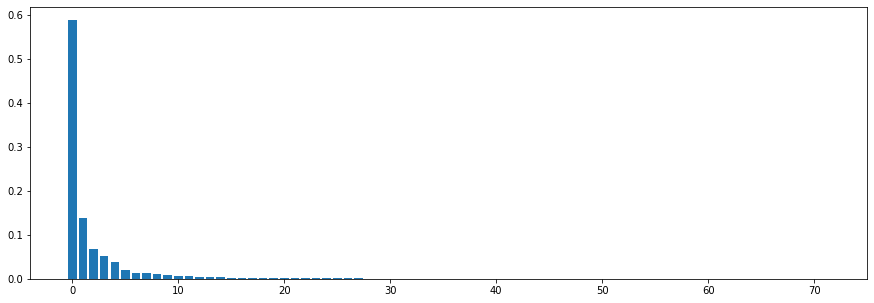

In [21]:
site1_day_aligned = bristol_dayaligned.query('SiteID == 1');
pca = dec.PCA(n_components=72, random_state=0)
pca.fit(site1_day_aligned)
plt.figure(figsize=(15,5))
plt.bar(range(0,72), pca.explained_variance_ratio_)
plt.show()

[0.58900596 0.72722179 0.79409131 0.84625699 0.8853502  0.90585433
 0.9201634  0.93238651 0.94223464 0.94976523 0.95646117 0.9620975
 0.96645848 0.97056908 0.97396026 0.97674456 0.97922803 0.98149213
 0.98373034 0.98571006 0.98757322 0.98936403 0.99094829 0.99222474
 0.9934267  0.99451716 0.99551051 0.99632472 0.99691798 0.99749834
 0.99798769 0.9982737  0.99853736 0.99872223 0.99887998 0.99901181
 0.99911673 0.99921638 0.999296   0.99937332 0.99944269 0.99950428
 0.99956205 0.9996179  0.99967195 0.99971944 0.99976566 0.9998091
 0.99984913 0.99988626 0.99991856 0.99994037 0.9999533  0.9999643
 0.99996957 0.99997434 0.99997803 0.999981   0.99998339 0.99998548
 0.99998737 0.99998905 0.99999053 0.99999192 0.99999323 0.99999442
 0.99999556 0.99999663 0.99999764 0.99999862 0.9999994  1.        ]


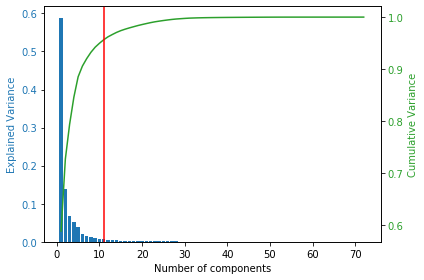

In [32]:
#5.2.
cum_var = np.cumsum(pca.explained_variance_ratio_) #cumulative sum of variance explained with [n] features
print(cum_var)
t = [i for i in range(1, 73)]
data1 = pca.explained_variance_ratio_
data2 = cum_var

fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of components')

color = 'tab:blue'
ax1.set_ylabel('Explained Variance', color=color)
ax1.bar(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Cumulative Variance', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=11, color='r')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [63]:
#5.4
#data_path_bristoldayaligned = os.path.join(os.getcwd(), 'BristolAir_DayAligned.csv')

trainset2_path = os.path.join(os.getcwd(), 'BristolAir_DayAligned.csv')
#os.path.join(os.getcwd(), 'Data', 'PartB','BristolAir_DayAligned.csv') 
ng_train = pd.read_csv(trainset2_path,delimiter = ',', header=[0], parse_dates=[1], index_col=[0,1], compression='bz2')

df_site1 = ng_train.loc[1,:]

In [65]:
splits = np.split(df_site1,3,axis=1)

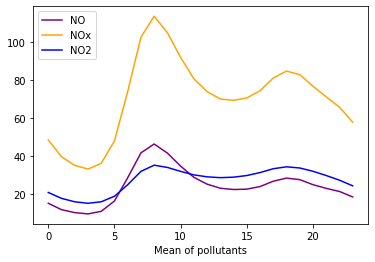

In [66]:
plt.plot(range(0,24), splits[2].mean(), color='purple', label = 'NO')
plt.plot(range(0,24), splits[0].mean(), color='orange', label = 'NOx')
plt.plot(range(0,24), splits[1].mean(), color='blue', label = 'NO2')

plt.xlabel("Mean of pollutants")
plt.legend(loc='upper left')

In [67]:
splits= np.array(np.array_split(pca.components_,3,axis=1))

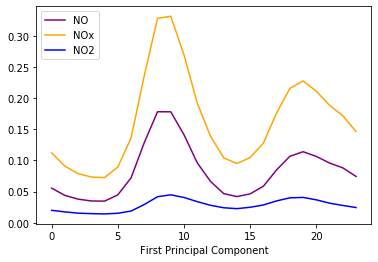

In [68]:
plt.plot(range(0,24), splits[2][0], color='purple', label = 'NO')
plt.plot(range(0,24), splits[0][0], color='orange', label = 'NOx')
plt.plot(range(0,24), splits[1][0], color='blue', label = 'NO2')

plt.xlabel("First Principal Component")
plt.legend(loc='upper left')

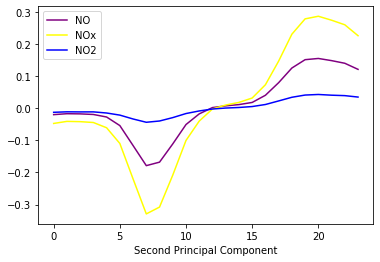

In [70]:
plt.plot(range(0,24), splits[2][1], color='purple', label = 'NO')
plt.plot(range(0,24), splits[0][1], color='yellow', label = 'NOx')
plt.plot(range(0,24), splits[1][1], color='blue', label = 'NO2')

plt.xlabel("Second Principal Component")
plt.legend(loc='upper left')

In [44]:
#6.
data_path_bristolaligned = os.path.join(os.getcwd(), 'BristolAir_SiteAligned.csv')
bristol_aligned = pd.read_csv(data_path_bristolaligned, delimiter = ',',header=[0,1], compression ='bz2', parse_dates=[0])
X = bristol_aligned.iloc[:,1:10]
y = bristol_aligned.iloc[:,10]

In [48]:
#6.1
def multi_way_split(y, sizes, splitter, random_state=None):
    """
    Convenience Function for wrapping a multi-way split. This only returns the indices of the split.
    This is actually implemented as a recursive function.

    :param y:               The target labels. If using a stratified splitter, then this must be the true targets:
                            otherwise, it is enough to be an empty array of the same length as the data.
    :param sizes:           The relative sizes of the three sets. Note that these should sum to 1.
    :param splitter:        The splitting object: this allows stratified/unstratified type splits (basically one of
                            ShuffleSplit or StratifiedShuffleSplit)
    :param random_state:    Any random state to employ
    :return:                N-tuple of indices, one each for the N sets.
    """
    # --- In either case, ensure that the sizes sum to 1! --- #
    sizes = npext.sum_to_one(sizes)
    # --- Base Case: We know how to do this --- #
    if len(sizes) == 2:
        return next(splitter(n_splits=1, train_size=sizes[0], test_size=sizes[1],
                             random_state=random_state).split(y, y))
    # --- Other Cases --- #
    #   This is a bit trickier. We have to first split assuming that all but the first set are grouped together. We then
    #   pass the second set of targets recursively to our function, with the remaining sizes. However, when the indices
    #   are returned, they must be remapped to the original index set, since they are indices into that set.
    else:
        sub_sizes = sizes[1:]
        left, right = next(splitter(n_splits=1, train_size=sizes[0], test_size=np.sum(sub_sizes),
                                    random_state=random_state).split(y, y))
        right_split = multi_way_split(y[right], sub_sizes, splitter, random_state + 1 if random_state is not None else None)
        idcs = [left]
        for i in right_split:
            idcs.append(right[i])
        return idcs

In [51]:
mws = multi_way_split(y, [0.60, 0.15, 0.25], ShuffleSplit, random_state=0)

In [52]:
print(len(mws[0]))
print(len(mws[1]))
print(len(mws[2]))

8937
2234
3724


In [71]:
#6.2
np.sqrt(((y[mws[0]] - y[mws[0]].mean()) ** 2).mean())

79.71384620780579

In [72]:
np.sqrt(((y[mws[1]] - y[mws[1]].mean()) ** 2).mean())

80.18975180976564

In [79]:
#6.3
reg = LinearRegression().fit(X.iloc[mws[0]], y.iloc[mws[0]])

In [80]:
predicts_train = reg.predict(X.iloc[mws[0]])
predicts_validation = reg.predict(X.iloc[mws[1]])

In [82]:
train_score = np.sqrt(mean_squared_error(y.iloc[mws[0]],predicts_train))
validation_score = np.sqrt(mean_squared_error(y.iloc[mws[1]],predicts_validation))
print(train_score)
print(validation_score)

39.83472027954455
41.12740349422


In [83]:
#6.5
regN = LinearRegression(normalize=True).fit(X.iloc[mws[0]], y.iloc[mws[0]])
sites=[1,2,4,6,7,10,12,14,16]

df = pd.DataFrame(sites)
print(df)
print(regN.coef_)
print(regN.coef_.sum())
df = pd.DataFrame((regN.coef_ / regN.coef_.sum()) * 100, sites)
df

    0
0   1
1   2
2   4
3   6
4   7
5  10
6  12
7  14
8  16
[ 0.11555569  0.00994714  0.13413921 -0.00679908  0.05938753  0.0797791
  0.12910957  0.09450729  0.16182776]
0.777454189444424


,0
1,14.863344
2,1.279450
4,17.253648
6,-0.874532
7,7.638717
10,10.261582
12,16.606711
14,12.155994
16,20.815086


In [86]:
#6.6
neigh = KNeighborsRegressor(n_jobs=-1).fit(X.iloc[mws[0]], y.iloc[mws[0]])

In [87]:
predictsTrain = neigh.predict(X.iloc[mws[0]])
predictsValidation = neigh.predict(X.iloc[mws[1]])

In [88]:
trainScore = np.sqrt(mean_squared_error(y.iloc[mws[0]],predictsTrain))
validationScore = np.sqrt(mean_squared_error(y.iloc[mws[1]],predictsValidation))
print(trainScore)
print(validationScore)

32.43647936515854
40.3071558368958


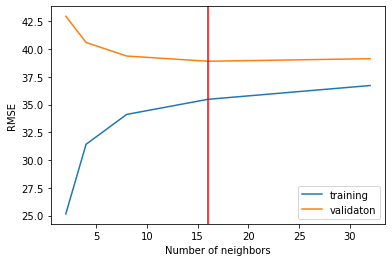

[25.149918774899085, 31.42280882774953, 34.11215836361028, 35.47142878389425, 36.715347607557376]
[42.95551269008171, 40.595609577419665, 39.37125304834977, 38.901851355962386, 39.13083888473987]


In [92]:
#6.7
valuesK = [2, 4, 8, 16, 32]
trains = []
valids = []
for k in valuesK:
    neigh = KNeighborsRegressor(n_neighbors=k, n_jobs=-1).fit(X.iloc[mws[0]], y.iloc[mws[0]])
    predictsTrain = neigh.predict(X.iloc[mws[0]])
    trains.append(np.sqrt(mean_squared_error(y.iloc[mws[0]],predictsTrain)))
    predictsValidation = neigh.predict(X.iloc[mws[1]])
    valids.append(np.sqrt(mean_squared_error(y.iloc[mws[1]],predictsValidation)))
plt.plot(valuesK, trains, label = "training")
plt.plot(valuesK, valids, label = "validaton")
plt.axvline(x=16, color = 'red')
plt.legend(loc="lower right")
plt.xlabel('Number of neighbors')
plt.ylabel('RMSE')
plt.show()
print(trains)
print(valids)

In [93]:
trains = []
valids = []
neigh = KNeighborsRegressor(n_neighbors=16, n_jobs=-1).fit(X.iloc[mws[0]], y.iloc[mws[0]])
predictsTrain = neigh.predict(X.iloc[mws[0]])
trains.append(np.sqrt(mean_squared_error(y.iloc[mws[0]],predictsTrain)))
predictsValidation = neigh.predict(X.iloc[mws[1]])
valids.append(np.sqrt(mean_squared_error(y.iloc[mws[1]],predictsValidation)))
print(valids)

[38.901851355962386]


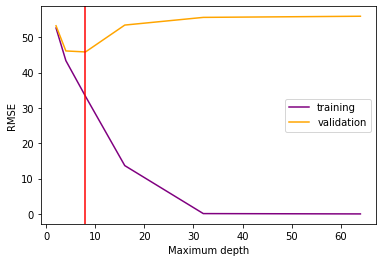

[52.6134623455056, 43.38835611468483, 33.27961915442297, 13.672221342095378, 0.09114909269816067, 0.0]
[53.25095179219833, 46.12769116861275, 45.84380928287788, 53.4486396323909, 55.62441997967441, 55.9470657647145]


In [106]:
#6.9
depths = [2, 4, 8, 16, 32, 64]
trains = []
valids = []
for k in depths:
    regressor = DecisionTreeRegressor(max_depth = k, random_state=0).fit(X.iloc[mws[0]], y.iloc[mws[0]])
    predictsTrain = regressor.predict(X.iloc[mws[0]])
    trains.append(np.sqrt(mean_squared_error(y.iloc[mws[0]],predictsTrain)))
    predictsValidation = regressor.predict(X.iloc[mws[1]])
    valids.append(np.sqrt(mean_squared_error(y.iloc[mws[1]],predictsValidation)))
plt.plot(depths, trains, label="training", color = 'purple')
plt.plot(depths, valids, label="validation",  color = 'orange')
plt.axvline(x=8, color = 'red')
plt.legend(loc="center right")
plt.xlabel('Maximum depth')
plt.ylabel('RMSE')
plt.show()
print(trains)
print(valids)

In [101]:
train_valid=np.concatenate((mws[0], mws[1]))

In [102]:
train_valid

array([8550, 5582, 3153, ..., 5739,  489, 5788])

In [103]:
baseline_score = np.sqrt(((y[train_valid] - y[train_valid].mean()) ** 2).mean())
print(baseline_score)

ln = LinearRegression(normalize=True).fit(X.iloc[train_valid], y.iloc[train_valid])
predicts= ln.predict(X.iloc[mws[2]])
lnreg_score = np.sqrt(mean_squared_error(y.iloc[mws[2]],predicts))
print(lnreg_score)

neigh = KNeighborsRegressor(n_neighbors=16,n_jobs=-1).fit(X.iloc[train_valid], y.iloc[train_valid])
predicts= neigh.predict(X.iloc[mws[2]])
knn_score = np.sqrt(mean_squared_error(y.iloc[mws[2]],predicts))
print(knn_score)

regressor = DecisionTreeRegressor(max_depth = 8, random_state=0).fit(X.iloc[train_valid], y.iloc[train_valid])
predicts= regressor.predict(X.iloc[mws[2]])
dt_score = np.sqrt(mean_squared_error(y.iloc[mws[2]],predicts))
print(dt_score)

79.81169768918508
40.509026852617026
37.98496506868247
43.06887110128105
